In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
cur_dir = os.getcwd()
father_dir = os.path.abspath(os.path.join(cur_dir, '..'))

## Generate fictitious reactions

In [120]:
from rxngraphormer.utils import gen_truth_false_rxn_smi

with open("./demo_data/demo_real_rxn_smi.txt","r") as fr:
    real_rxn_smi_lst = fr.readlines()
    real_rxn_smi_lst = [i.strip() for i in real_rxn_smi_lst]

real_fitc_rxn_smi = []
for real_rxn_smi in real_rxn_smi_lst:
    rct_smi,pdt_smi = real_rxn_smi.split(">>")
    real_fitc_rxn_smi.append(gen_truth_false_rxn_smi([rct_smi,pdt_smi,True]))

We don't seperate additives and solvents from reactants, and use `gen_truth_false_rxn_smi` to generate fake product to build fictitious reactions.

In [121]:
idx = 0

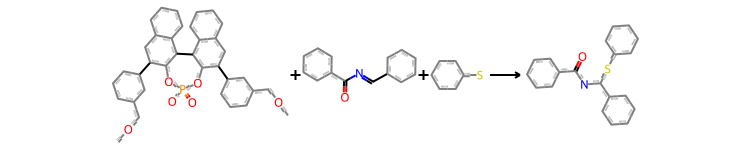

In [122]:
AllChem.ReactionFromSmarts(real_fitc_rxn_smi[idx][0][0])  ## real reaction

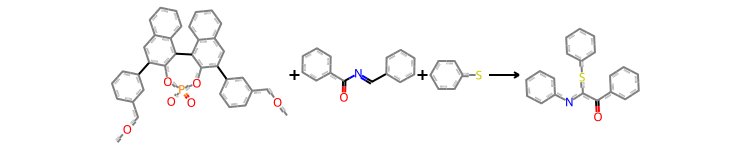

In [123]:
AllChem.ReactionFromSmarts(real_fitc_rxn_smi[idx][1][0]) ## ficitious reaction

## Generate delta-mol

In [125]:
from rxngraphormer.midgen.midmol import gen_mech_mid_smi
delta_mol_smi_lst = []
for real_rxn_smi in real_rxn_smi_lst:
    rct_pdt_pair = real_rxn_smi.split(">>")
    delta_mol_smi,_,_ = gen_mech_mid_smi(rct_pdt_pair)
    delta_mol_smi_lst.append(delta_mol_smi)

In [129]:
idx = 0

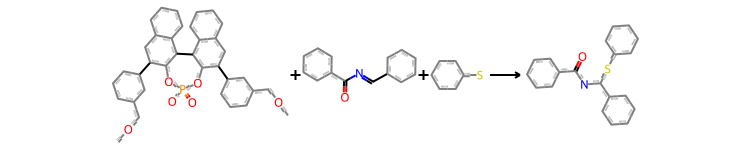

In [134]:
AllChem.ReactionFromSmarts(real_rxn_smi_lst[idx])   # original reaction

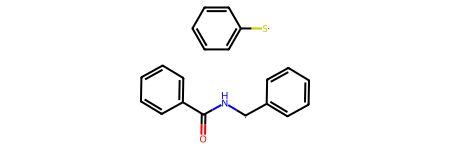

In [132]:
Chem.MolFromSmiles(delta_mol_smi_lst[idx])          # delta-mol graph

## Model evaluation

In [2]:
import glob
import numpy as np
from rxngraphormer.eval import eval_regression_performance
all_results = {}

/usr/conda/lib/python3.8/site-packages/torch_geometric/typing.py:18: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/xulicheng/.local/lib/python3.8/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "


### Buchwald-Hartwig

Random split

In [5]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/buchwald_harwig/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"BH: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"BH: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["BH"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 0, R2: 0.9710909487204781, MAE: 2.9784882068634033


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 1, R2: 0.9713378184621531, MAE: 2.9998555183410645


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 2, R2: 0.973510050319587, MAE: 2.974090337753296


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 3, R2: 0.9725862839027026, MAE: 2.917022943496704


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 4, R2: 0.9716989736953793, MAE: 3.025137424468994


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 5, R2: 0.968652117112244, MAE: 3.1029109954833984


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 6, R2: 0.9684075810272844, MAE: 3.1116371154785156


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 7, R2: 0.9699690383479945, MAE: 3.0748560428619385


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 8, R2: 0.9744857985465217, MAE: 3.0239007472991943


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 9, R2: 0.9723437052997101, MAE: 3.005789279937744
BH: 0.97141±0.00187
BH: 3.02137±0.05775


Out-of-sample test

In [154]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/buchwald_harwig/*OOS")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True, specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)

all_results["BH_OOS"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Cl_OOS, R2: -0.0532716042778254, MAE: 15.12170696258545


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Br_OOS, R2: 0.8895972435426174, MAE: 5.8067522048950195


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


I_OOS, R2: 0.8231701775976915, MAE: 7.538468360900879


### Suzuki-Miyaura

Random split

In [155]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/suzuki_miyaura/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=100,yield_constrain=True)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"SM: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"SM: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["SM"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 0, R2: 0.8400846370685718, MAE: 7.387648582458496


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 1, R2: 0.8573087255899388, MAE: 6.610939025878906


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 2, R2: 0.8761585448760497, MAE: 6.297993183135986


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 3, R2: 0.8720339379622586, MAE: 6.248344898223877


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 4, R2: 0.8715973957995974, MAE: 6.373606204986572


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 5, R2: 0.8852615147349145, MAE: 6.281859874725342


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 6, R2: 0.8882406819382547, MAE: 6.171862602233887


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 7, R2: 0.8881091441130639, MAE: 6.038573265075684


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 8, R2: 0.8711405059356234, MAE: 6.1986894607543945


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 9, R2: 0.882243505478709, MAE: 6.107220649719238
SM: 0.87322±0.01429
SM: 6.37167±0.36999


### Radical C-H functionalization

Random split

In [156]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/C_H_func/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"CH: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"CH: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["CH"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 0, R2: 0.9927572106456958, MAE: 0.25295668840408325


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 1, R2: 0.9931484819862645, MAE: 0.26806801557540894


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 2, R2: 0.9915015888593343, MAE: 0.26732149720191956


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 3, R2: 0.9923498451474132, MAE: 0.2663370668888092


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 4, R2: 0.9929075121482666, MAE: 0.265802800655365


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 5, R2: 0.9921873889124854, MAE: 0.268579363822937


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 6, R2: 0.9928988635441124, MAE: 0.2759894132614136


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 7, R2: 0.9907799790015821, MAE: 0.2750856280326843


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 8, R2: 0.9916349510476888, MAE: 0.2780734598636627


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 9, R2: 0.9925413233374819, MAE: 0.2785036563873291
CH: 0.99227±0.00071
CH: 0.26967±0.00730


### Thiol addition

In [157]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/thiol_addition/seed*")
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx,path in enumerate(path_lst):
    r2,mae,preds,targets = eval_regression_performance(path,ckpt_file="valid_checkpoint.pt", scale=1,yield_constrain=False)
    print(f"Trial {idx}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
print(f"TA: {np.mean(all_r2):.5f}±{np.std(all_r2):.5f}")
print(f"TA: {np.mean(all_mae):.5f}±{np.std(all_mae):.5f}")
all_results["TA"] = [all_r2,all_mae,all_preds,all_targets]
os.chdir(cur_dir)

/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 0, R2: 0.9096076385452436, MAE: 0.1410418003797531


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 1, R2: 0.9254825208150377, MAE: 0.13669796288013458


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 2, R2: 0.9045894500410591, MAE: 0.13625450432300568


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 3, R2: 0.9149569950023293, MAE: 0.13379794359207153


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 4, R2: 0.9144403507145658, MAE: 0.13580460846424103


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 5, R2: 0.9078113605549663, MAE: 0.14370280504226685


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 6, R2: 0.9234534860657602, MAE: 0.12996156513690948


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 7, R2: 0.9177492014157842, MAE: 0.140384241938591


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 8, R2: 0.9170189911074739, MAE: 0.1370164155960083


/usr/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


Trial 9, R2: 0.9251684782667853, MAE: 0.12802831828594208
TA: 0.91603±0.00689
TA: 0.13627±0.00458


### Visulization

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

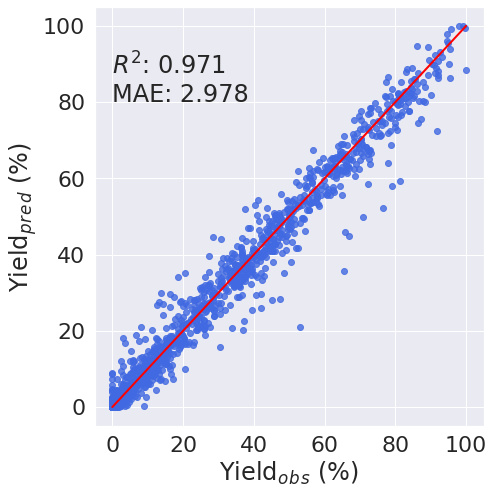

In [ ]:
all_r2,all_mae,all_preds,all_targets = all_results["BH"]
idx = 0  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,100],[0,100],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,120,20)))
plt.yticks(list(range(0,120,20)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
print()

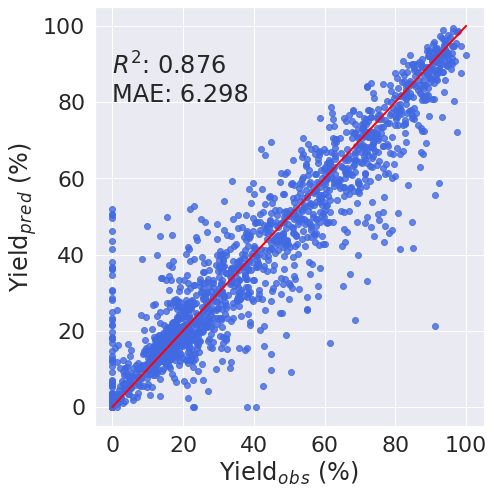

In [162]:
all_r2,all_mae,all_preds,all_targets = all_results["SM"]
idx = 2  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,100],[0,100],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,120,20)))
plt.yticks(list(range(0,120,20)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
print()

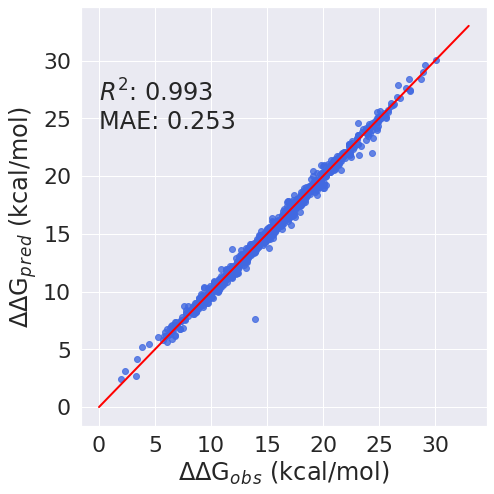

In [163]:
all_r2,all_mae,all_preds,all_targets = all_results["CH"]
idx = 0  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,33],[0,33],color="red",linestyle="-",linewidth=2)
plt.xticks(list(range(0,35,5)))
plt.yticks(list(range(0,35,5)))
plt.text(0,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
print()

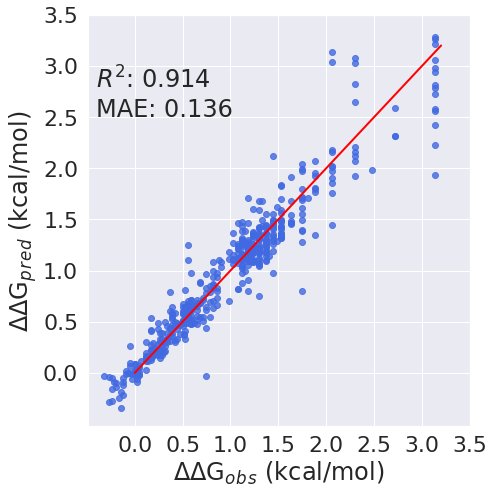

In [166]:
all_r2,all_mae,all_preds,all_targets = all_results["TA"]
idx = 4  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid",font_scale=2)
plt.figure(figsize=(7,7))
plt.scatter(x=targets.cpu().view(-1),y=preds.cpu().view(-1),color="royalblue",alpha=0.8)
plt.plot([0,3.2],[0,3.2],color="red",linestyle="-",linewidth=2)
plt.xticks(list(np.arange(0,4.0,0.5)))
plt.yticks(list(np.arange(0,4.0,0.5)))
plt.text(-0.4,targets.cpu().view(-1).max()*0.8,f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
print()

## Generate reaction embeddings

In [14]:
from rxngraphormer.rxn_emb import RXNEMB
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

### Using pre-trained model

Measure the distance between different reaction types in USPTO-50k

In [3]:
rxnemb_calc = RXNEMB(pretrained_model_path="../model_path/pretrained_classification_model")
rxn_emb = rxnemb_calc.gen_rxn_emb_from_dataset(root="../dataset/50k_with_rxn_type",
                                               rct_name_regrex="50k_rxn_type_rct_0.csv",
                                               pdt_name_regrex="50k_rxn_type_pdt_0.csv",
                                               batch_size=128)

Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ../dataset/50k_with_rxn_type/50k_rxn_type_rct_0.csv is processing...


  0%|          | 0/50000 [00:00<?, ?it/s]/usr/conda/lib/python3.8/site-packages/rxngraphormer/data.py:460: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mol_index=mol_index,y=tgt_,ext_feat=torch.tensor(ext_feat_desc).float())
100%|██████████| 50000/50000 [02:18<00:00, 360.34it/s]


[INFO] 50000 data index 0 is saving...


Done!
Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ../dataset/50k_with_rxn_type/50k_rxn_type_pdt_0.csv is processing...


100%|██████████| 50000/50000 [01:18<00:00, 639.94it/s]


[INFO] 50000 data index 0 is saving...


Done!


[INFO] Generating reaction embedding...


  0%|          | 0/391 [00:00<?, ?it/s]/usr/conda/lib/python3.8/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)
100%|██████████| 391/391 [00:56<00:00,  6.89it/s]


In [13]:
dataset_50k_file = "../dataset/50k_with_rxn_type/schneider50k.tsv"
dataset_50k_df = pd.read_csv(dataset_50k_file,sep='\t')
rxn_lst = dataset_50k_df["rxn"].tolist()
rxn_class_lst = dataset_50k_df["rxn_class"].tolist()
rxn_class_set = list(set(rxn_class_lst))
rxn_class_set = sorted(rxn_class_set,key=lambda x: (int(x.split(".")[0]),int(x.split(".")[1]),int(x.split(".")[2])))  # sort by rxn_class
rxn_class_ct_map = sorted([[rxn_class,rxn_class_lst.count(rxn_class)] for rxn_class in rxn_class_set],key=lambda x:x[1])
rxn_class_idx_map = {}
for idx in range(len(rxn_class_lst)):
    rxn_class = rxn_class_lst[idx]
    if rxn_class not in rxn_class_idx_map:
        rxn_class_idx_map[rxn_class] = []
    rxn_class_idx_map[rxn_class].append(idx)

# calculate distance matrix
rxn_class_dist_mat = np.zeros(shape=(len(rxn_class_set),len(rxn_class_set)))
tot_comb = len(rxn_class_set) ** 2
for rxn_class_id_0 in range(len(rxn_class_set)):
    for rxn_class_id_1 in range(len(rxn_class_set)):
        rxn_class_0 = rxn_class_set[rxn_class_id_0]
        rxn_class_1 = rxn_class_set[rxn_class_id_1]
        dist = pairwise_distances(rxn_emb[rxn_class_idx_map[rxn_class_0]],rxn_emb[rxn_class_idx_map[rxn_class_1]],metric="euclidean").mean()
        rxn_class_dist_mat[rxn_class_id_0,rxn_class_id_1] = dist

<Axes: >

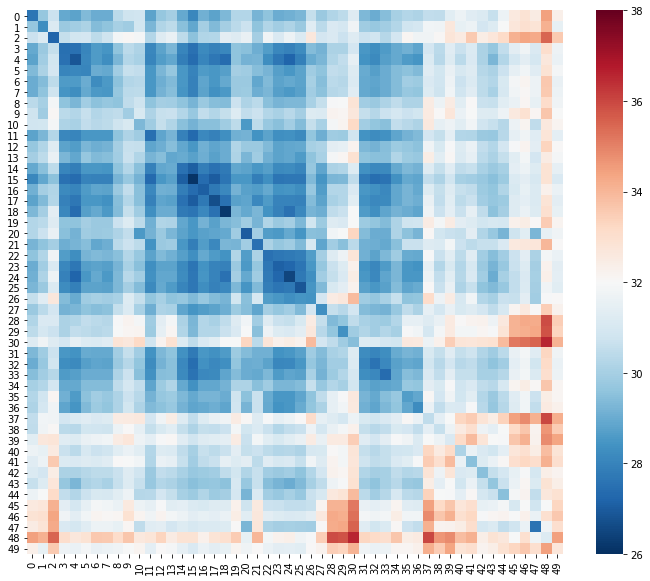

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(rxn_class_dist_mat,cmap="RdBu_r",annot=False,vmin=26,vmax=38)

### Using fine-tuned model

In [22]:
from sklearn.manifold import TSNE

In [21]:
rct_data_file = "../dataset/SM_rct_tot.csv"
pdt_data_file = "../dataset/SM_pdt_tot.csv"

with open(rct_data_file,"r") as fr:
    rct_dataset = [line.strip().split(",")[0] for line in fr.readlines()]
with open(rct_data_file,"r") as fr:
    target = np.array([float(line.strip().split(",")[1]) for line in fr.readlines()],dtype=np.float32)
with open(pdt_data_file,"r") as fr:
    pdt_dataset = [line.strip().split(",")[0] for line in fr.readlines()]

rxnemb_calc_pretrained = RXNEMB(pretrained_model_path="../model_path/pretrained_classification_model")
rxnemb_calc_downstream = RXNEMB(pretrained_model_path="../model_path/suzuki_miyaura/seed1",model_type="regressor")

pt_rxn_emb = rxnemb_calc_pretrained.gen_rxn_emb([f"{rct}>>{pdt}" for rct,pdt in zip(rct_dataset,pdt_dataset)],batch_size=128)
ds_rxn_emb = rxnemb_calc_downstream.gen_rxn_emb([f"{rct}>>{pdt}" for rct,pdt in zip(rct_dataset,pdt_dataset)],batch_size=128)

Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/rct_smiles_0.csv is processing...


  0%|          | 0/5760 [00:00<?, ?it/s]/usr/conda/lib/python3.8/site-packages/rxngraphormer/data.py:460: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mol_index=mol_index,y=tgt_,ext_feat=torch.tensor(ext_feat_desc).float())
100%|██████████| 5760/5760 [00:29<00:00, 194.06it/s]


[INFO] 5760 data index 0 is saving...


Done!
Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/pdt_smiles_0.csv is processing...


100%|██████████| 5760/5760 [00:10<00:00, 568.91it/s]


[INFO] 5760 data index 0 is saving...


Done!


[INFO] Generating reaction embedding...


  0%|          | 0/45 [00:00<?, ?it/s]/usr/conda/lib/python3.8/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)
100%|██████████| 45/45 [00:09<00:00,  4.77it/s]
Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/rct_smiles_0.csv is processing...


100%|██████████| 5760/5760 [00:29<00:00, 195.55it/s]


[INFO] 5760 data index 0 is saving...


Done!
Processing...


[INFO] There are 1 data files in total
[INFO] All data 1 files will be used
[INFO] ./rxn_emb_tmp/pdt_smiles_0.csv is processing...


100%|██████████| 5760/5760 [00:09<00:00, 585.01it/s]


[INFO] 5760 data index 0 is saving...


Done!


[INFO] Generating reaction embedding...


100%|██████████| 45/45 [00:09<00:00,  4.85it/s]


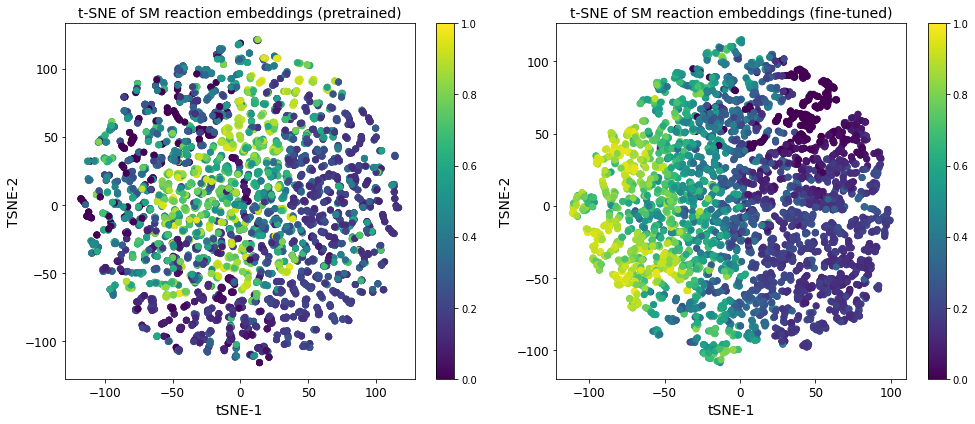

In [24]:
tick_font_size = 12
label_font_size = 14
perplexity = 5

tsne = TSNE(n_components=2,perplexity=perplexity,learning_rate=200,init="pca",random_state=42)
pt_rxn_emb_2d = tsne.fit_transform(pt_rxn_emb)
ds_rxn_emb_2d = tsne.fit_transform(ds_rxn_emb)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.scatter(pt_rxn_emb_2d[:,0],pt_rxn_emb_2d[:,1],c=target)
plt.xlabel("tSNE-1",fontsize=label_font_size)
plt.ylabel("TSNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.title(f"t-SNE of SM reaction embeddings (pretrained)",fontsize=label_font_size)
plt.colorbar()

plt.subplot(122)
plt.scatter(ds_rxn_emb_2d[:,0],ds_rxn_emb_2d[:,1],c=target)
plt.xlabel("tSNE-1",fontsize=label_font_size)
plt.ylabel("TSNE-2",fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.title(f"t-SNE of SM reaction embeddings (fine-tuned)",fontsize=label_font_size)
plt.colorbar()
plt.tight_layout()